In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [21]:
def multivargauss(mu, sig):
    n_dim = mu.shape[0]
    x = np.random.rand(n_dim)
    u = x-mu
    sig_inv = np.linalg.inv(sig)
    
    print(np.dot(u.T, sig_inv, u))

In [22]:
multivargauss(np.array([1,2]), np.random.rand(2,2))

[-1.40774316 -2.09111397]


In [60]:
def MultiVarGaussGen(n_dim, n_samples, mu=0, sigma=1):
    l = []
    for i in range(n_samples):
        l.append(np.random.rand(1,n_dim))
    l = np.array(l)
    print(l)
    l = l.reshape(-1,2)
    print(l)
    return l

/home/udion/Misc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/home/udion/Misc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


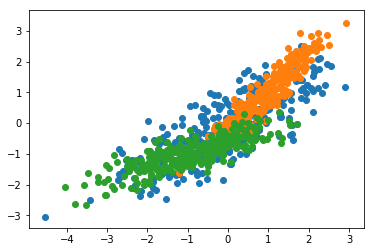

In [126]:
mu1 = 1*np.ones(2)
mu2 = -1*np.ones(2)
sig1 = np.random.rand(2,2)
sig2 = np.random.rand(2,2)
v1 = np.random.multivariate_normal(mu1, sig1, 300)
v2 = np.random.multivariate_normal(mu2, sig2, 300)
v = v1+v2
plt.scatter(v[:,0], v[:,1])
plt.scatter(v1[:,0], v1[:,1])
plt.scatter(v2[:,0], v2[:,1])
plt.show()

In [157]:
np.random.choice(np.arange(1, 7), p=[0.1, 0.05, 0.05, 0.2, 0.4, 0.2])

6

In [215]:
a = dict()
a[1] = []
a[1].append(1)
a

{1: [1]}

In [243]:
class GMMsampler:
    
    def __init__( self, n_samples, n_components=1, weights=[1], mu=[np.array([0,0])], sig=[np.array([[1,0],[0,1]])]):
        self.n_components = n_components
        self.n_samples = n_samples
        self.weights = weights
        self.mu = mu
        self.sig = sig
        self.dim = mu[0].size
        self.data = np.empty([n_samples, self.dim])
        self.datacid = dict()
        
    def check_musig(self):
        shmu = self.mu[0].shape
        shsig = self.sig[0].shape
        if(not(all(m.shape==shmu for m in mu))):
            print('all mean vectors must be of same dimension')
        if(not(all(s.shape==shmu for s in sig))):
            print('all covariance matrix must be of same dimension')
    
    def gen_sample(self):
        for i in range(self.n_components):
            self.datacid[i] = []
        for i in range(self.n_samples):
            idx = np.random.choice(np.arange(0,self.n_components), p=(self.weights)/np.sum(self.weights))
            mu_,sig_ = self.mu[idx], self.sig[idx]
            self.data[i,:] = np.random.multivariate_normal(mu_, sig_)
            self.datacid[idx].append(self.data[i,:])
        for idx in range(self.n_components):
            self.datacid[idx] = np.array(self.datacid[idx]).reshape(-1,2)

In [244]:
m1 = np.array([1,0])
m2 = np.array([0,3])
m3 = np.array([4,1])
sig1 = np.random.rand(2,2)
sig2 = np.random.rand(2,2)
sig3 = np.random.rand(2,2)
g = GMMsampler(400,3,weights=[0.3, 0.5, 0.2], mu=[m1, m2, m3], sig=[sig1, sig2, sig3])

In [246]:
g.gen_sample()

/home/udion/Misc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: covariance is not positive-semidefinite.


In [249]:
g.datacid[0][:,1]

array([-0.27728597,  0.39848606,  0.52210547,  0.02192753,  0.56756448,
       -1.16104564,  0.57067989,  1.10333413, -0.09271835,  1.13542714,
        0.42835788,  1.46949603, -0.28596838,  1.3875214 , -0.48790983,
       -0.09359359, -0.64897191,  0.00372418,  0.90473907, -0.00417413,
        1.77330345,  0.39065731,  0.4960232 , -0.5655779 ,  1.18563909,
       -0.91054572,  0.25212093,  0.43890721, -1.6147508 ,  0.09775563,
        0.28339397,  0.65691388,  1.47745281,  0.36862118,  0.95852415,
       -0.02344753,  0.14392525,  0.27207934,  0.0031704 ,  0.58524206,
        0.2629916 ,  0.0976081 ,  0.82133287, -0.08212991,  0.74760918,
       -0.09849501, -0.08490546,  0.41532561, -0.61115078, -0.69401894,
       -0.23159189, -0.37775964, -1.3420245 , -0.90208481, -0.20753891,
        0.64259668, -0.48435523, -0.40375687, -0.1910805 ,  1.06719271,
        0.41486498,  0.89522718, -0.70443176, -0.58943944,  0.67463914,
       -1.15537289, -0.10727897,  0.22865004,  0.35265478,  0.48

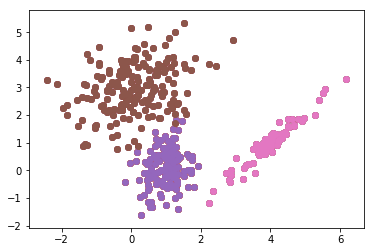

In [251]:
plt.scatter(g.data[:,0],g.data[:,1])
plt.scatter(g.datacid[0][:,0], g.datacid[0][:,1])
plt.scatter(g.datacid[1][:,0], g.datacid[1][:,1])
plt.scatter(g.datacid[2][:,0], g.datacid[2][:,1])
plt.show()